In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import math

In [367]:
df=pd.read_csv("https://raw.githubusercontent.com/laknath123/PDS_final_project_animalshelter/main/data/merged_df.csv")

In [368]:
df.head()

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,seq,indicator_col
0,0,A0061001,A006100,2014-03-07 14:26:00,March 2014,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2434.0,1.0,both
1,1,A0061002,A006100,2014-12-19 10:21:00,December 2014,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2721.0,2.0,both
2,2,A0061003,A006100,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,3804.0,3.0,both
3,3,A0477591,A047759,2014-04-02 15:55:00,April 2014,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,...,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor,3657.0,1.0,both
4,4,A1340671,A134067,2013-11-16 09:02:00,November 2013,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,5875.0,1.0,both


In [369]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Name_intakes', 'DateTime_intake',
       'MonthYear_intake', 'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intake', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intake', 'Color_intake', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes', 'age', 'seq',
       'indicator_col'],
      dtype='object')

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138271 entries, 0 to 138270
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            138271 non-null  int64  
 1   Animal ID             138271 non-null  object 
 2   Name_intakes          138271 non-null  object 
 3   DateTime_intake       138271 non-null  object 
 4   MonthYear_intake      138271 non-null  object 
 5   Found Location        138271 non-null  object 
 6   Intake Type           138271 non-null  object 
 7   Intake Condition      138271 non-null  object 
 8   Animal Type_intake    138271 non-null  object 
 9   Sex upon Intake       138271 non-null  object 
 10  Age upon Intake       138271 non-null  object 
 11  Breed_intake          138271 non-null  object 
 12  Color_intake          138271 non-null  object 
 13  Name_outcomes         137335 non-null  object 
 14  DateTime_outcomes     137335 non-null  object 
 15  

In [371]:
df.loc[:,'Animal Type_intake']

0         Dog
1         Dog
2         Dog
3         Dog
4         Dog
         ... 
138266    Cat
138267    Cat
138268    Dog
138269    Dog
138270    Dog
Name: Animal Type_intake, Length: 138271, dtype: object

### Random Exploration

In [372]:
df[df.loc[:,'Animal Type_intake']!=df.loc[:,'Animal Type_outcomes']]

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,seq,indicator_col
2519,2519,A6129392,A612939,2022-03-15 14:20:00,March 2022,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3423,3423,A6366291,A636629,2014-09-07 16:31:00,September 2014,706 Terrace Mountain Drive in Austin (TX),Stray,Normal,Cat,Spayed Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3815,3815,A6455131,A645513,2015-05-18 07:30:00,May 2015,3001 Sauls in Austin (TX),Stray,Injured,Cat,Neutered Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3994,3994,A6484932,A648493,2022-01-05 15:01:00,January 2022,7201 Levander Loop in Austin (TX),Abandoned,Normal,Dog,Neutered Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4404,4404,A6550931,A655093,2021-10-01 12:13:00,October 2021,Manor (TX),Owner Surrender,Normal,Dog,Neutered Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138266,138266,A8554661,A855466,2022-04-18 15:15:00,April 2022,12102 Cottage Promenade Court in Austin (TX),Stray,Normal,Cat,Neutered Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138267,138267,A8554691,A855469,2022-04-18 15:47:00,April 2022,Austin (TX),Stray,Medical,Cat,Spayed Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138268,138268,A8554701,A855470,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138269,138269,A8554711,A855471,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Cats vs Dogs


### Test of Independence for Adoption/Return between Cats and Dogs

We perform a Chi-squared test to test the independence between two categorical variables.

$ H_{0} $ : There is no differnece between observed and expected frequencies of Adoption/Return to Owner of Cats and Dogs i.e they are independent of eachother

$ H_{1} $ : There is a differnece between observed and expected frequencies of Adoption/Return to Owner of Cats and Dogs i.e they are dedependent on eachother



In [373]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [374]:
def get_contingency_table(df):
    chisqt = pd.crosstab(df['Animal Type_outcomes'], df['Outcome Type'], margins=True)
    chisqt['Adopted/Returned to Owner'] = chisqt['Adoption'] + chisqt['Return to Owner']
    chisqt['Other Outcomes'] = chisqt['All'] - chisqt['Adopted/Returned to Owner']
    df = chisqt.loc[['Cat','Dog'],['Adopted/Returned to Owner','Other Outcomes']]
    return df.to_numpy(), df
    
    

In [375]:
contingency_table, ct_df = get_contingency_table(df)
contingency_table

array([[27061, 24818],
       [57606, 19852]], dtype=int64)

In [376]:
ct_df.head()

Outcome Type,Adopted/Returned to Owner,Other Outcomes
Animal Type_outcomes,,
Cat,27061,24818
Dog,57606,19852


#### Computing the statistics

In [377]:
chi_sq, pvalue, dof, expected = chi2_contingency(contingency_table)
chi_sq,pvalue,dof,expected

(6777.044635494673,
 0.0,
 1,
 array([[33961.19666453, 17917.80333547],
        [50705.80333547, 26752.19666453]]))

#### Interpretation and Conclusion

In the above experiment,
Chi-Squared Statistical Value = 6777.04
P-Value = 0
Degree of Freedom = 1

Therefore, since the p-value is less than 0.05, we reject the NULL hypothesis and conclude that there isadoption of dog and adoption of cats are not independent events.

__Now that we understand that they are dependent on eachother, let us understand which is most desired. In order to do this, we will perform the following analysis -__
1. Which one of the two is more likely to be adopted?
2. Does the breed of the more likely animal affect its desirability?

###  Which one of the two is more likely to be adopted?

In [378]:
def flag_cats_dogs(df):
    df['catdog_flag'] = df['Animal Type_outcomes'].apply(lambda x: x if x=='Cat' or x == 'Dog' else 'Others')
    return df

In [379]:
df = flag_cats_dogs(df)

In [380]:
df['catdog_flag'].value_counts()

Dog       77458
Cat       51879
Others     8934
Name: catdog_flag, dtype: int64

In [381]:
df_stackedbar = pd.crosstab(df['Outcome Type'],df['catdog_flag'])

In [382]:
df_stackedbar.head()


catdog_flag,Cat,Dog,Others
Outcome Type,,,
Adoption,24680,37167,935
Died,762,296,228
Disposal,91,48,488
Euthanasia,2120,1864,5073
Missing,35,31,5


In [383]:
df_stackedbar2 = pd.crosstab(df['catdog_flag'],df['Outcome Type'])

<AxesSubplot:xlabel='catdog_flag'>

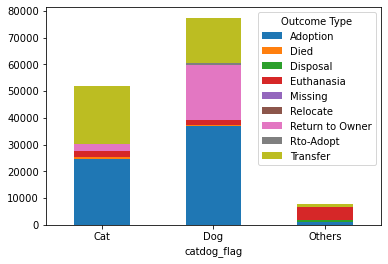

In [384]:
df_stackedbar2.plot.bar(stacked=True, rot=0)

In [385]:
def get_stacked_bars(df):
    X = df.columns.to_list()
    w = 0.6
    for i in df.index.to_list():
        Y = df.loc[i].to_list()
        plt.bar(X, Y, w, label=str(i))
    
    plt.ylabel("Count")
    plt.xlabel("Animal Type")
    plt.legend()
    plt.show()
        

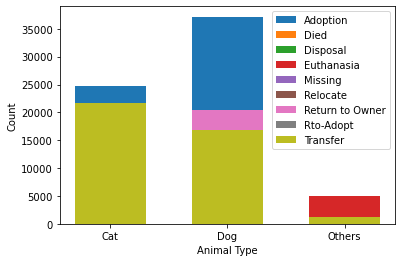

In [386]:
get_stacked_bars(df_stackedbar)

#### Interpretation and Conclusion

We can observe from the above stacked bar chart that dogs have more number of adoptions and returns to owner than cats or other animal types. 

__This means that dogs are clearly more desirable from our preliminary analysis. However, can we extend this conclusion to all types of dogs? Are certain breeds less likely to find a home?__

### Does a dog breed affect its desirability to find a home?

Let's start by seeing what are the common breeds at the animal shelter

In [387]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Name_intakes', 'DateTime_intake',
       'MonthYear_intake', 'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intake', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intake', 'Color_intake', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes', 'age', 'seq',
       'indicator_col', 'catdog_flag'],
      dtype='object')

In [388]:
df['Breed_outcomes'].unique()

array(['Spinone Italiano Mix', 'Dachshund', 'Shetland Sheepdog', ...,
       'Shiba Inu/Alaskan Husky', 'Redbone Hound/German Shepherd',
       'German Shorthair Pointer/Beagle'], dtype=object)

__Some breeds have a suffix "Mix" like Spinone Italiano Mix, Pitbull Mix, etc. For the sake of simplicity of this analysis, we will treat the Mix and Non-Mix breeds under one bucket__

In [417]:
def get_breed_distribution(animal_df):
    animal_df['Breed_outcomes'] = animal_df['Breed_outcomes'].apply(lambda x: x if "Mix" not in str(x) else x.replace(" Mix","").strip())
    breed = animal_df.groupby(['Breed_outcomes']).size().reset_index(name='count').sort_values(by='count', ascending=False)
    breed_10=breed.head(10)
    # Bar plot
    fig = plt.figure(figsize=(8,10))
    sns.barplot('count','Breed_outcomes',
                     data=breed_10, palette='husl', linewidth=0.7, edgecolor='k')  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
    plt.ylabel('Dog Breed', fontsize=14)
    plt.xlabel('Count', fontsize=14)
    plt.title("Top 10 Breed Types")

<ipython-input-417-8783c1ef47a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_df['Breed_outcomes'] = animal_df['Breed_outcomes'].apply(lambda x: x if "Mix" not in str(x) else x.replace(" Mix","").strip())
C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


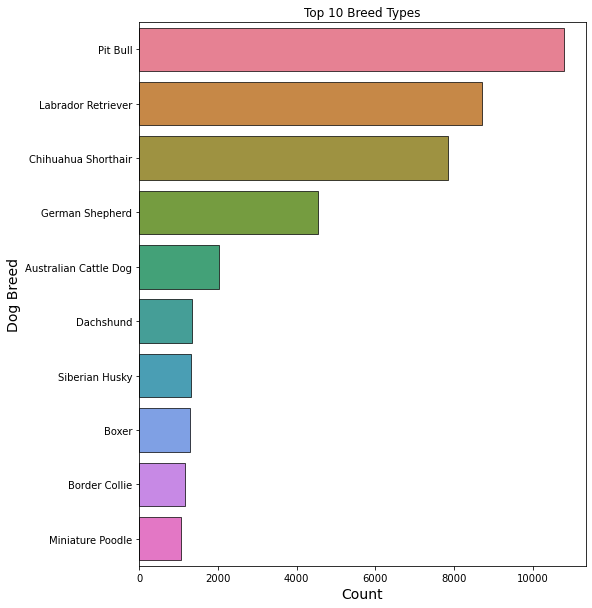

In [418]:
df_dogs = df[df['Animal Type_outcomes'].isin(['Dog'])]
get_breed_distribution(df_dogs)

In [426]:
analyze_breed = "Pit Bull"
def get_breed_types(breed):
    print(df['Breed_outcomes'].apply(lambda x: x if breed in str(x) else 'Other Breeds').unique())

get_breed_types(analyze_breed)

['Other Breeds' 'Labrador Retriever/Pit Bull' 'Pit Bull/Catahoula'
 'Pit Bull Mix' 'Pit Bull/Labrador Retriever' 'Pit Bull'
 'Australian Cattle Dog/Pit Bull' 'Pit Bull/Chinese Sharpei'
 'Whippet/Pit Bull' 'Boxer/Pit Bull' 'Queensland Heeler/Pit Bull'
 'Pit Bull/German Shepherd' 'Pit Bull/Pug' 'Pit Bull/Boxer'
 'Pointer/Pit Bull' 'Catahoula/Pit Bull' 'Australian Kelpie/Pit Bull'
 'Chinese Sharpei/Pit Bull' 'Labrador Retriever/American Pit Bull Terrier'
 'German Shepherd/Pit Bull' 'Pit Bull/Australian Cattle Dog'
 'Bulldog/Pit Bull' 'Carolina Dog/Pit Bull' 'Blue Lacy/Pit Bull'
 'Basset Hound/Pit Bull' 'Golden Retriever/Pit Bull'
 'American Pit Bull Terrier/Catahoula' 'Pit Bull/Plott Hound'
 'Pit Bull/Rhod Ridgeback' 'American Pit Bull Terrier'
 'Dachshund/Pit Bull' 'American Staffordshire Terrier/Pit Bull'
 'American Pit Bull Terrier Mix' 'Doberman Pinsch/Pit Bull'
 'Chihuahua Shorthair/Pit Bull'
 'Irish Wolfhound/American Pit Bull Terrier' 'Pit Bull/Dalmatian'
 'Pit Bull/French Bulldog'

We can see that Pitbull (and its mixed variants) is one of the most common breeds in the shelter and we have sufficient data for it. __Therefore, let us assess the desirability of Pitbull (including all its variants) as a breed compared to others__.

### Analyzing the impact of a dog's breed on its desirability

### How do we define desirability of a breed?

Following are a few metrics that will in combination help us assess the desirability of a certain breed.
1. Avg # Days to Adoption - lower makes it more desirable
2. % Adoption - higher makes it more desirable
3. % Return to Owner - higher makes it more desirable
4. % Stray - lesser makes it more desirable
5. % Owner Surrender - lower makes it more desirable
6. Avg # Days to Return to Owner - lower makes it more desirable

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138271 entries, 0 to 138270
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            138271 non-null  int64  
 1   Animal ID             138271 non-null  object 
 2   Name_intakes          138271 non-null  object 
 3   DateTime_intake       138271 non-null  object 
 4   MonthYear_intake      138271 non-null  object 
 5   Found Location        138271 non-null  object 
 6   Intake Type           138271 non-null  object 
 7   Intake Condition      138271 non-null  object 
 8   Animal Type_intake    138271 non-null  object 
 9   Sex upon Intake       138271 non-null  object 
 10  Age upon Intake       138271 non-null  object 
 11  Breed_intake          138271 non-null  object 
 12  Color_intake          138271 non-null  object 
 13  Name_outcomes         137335 non-null  object 
 14  DateTime_outcomes     137335 non-null  object 
 15  

In [450]:
def flag_breed(df, breed):
    colname = str.lower(breed.replace(" ",""))+"_flag"
    df[colname] = df['Breed_outcomes'].apply(lambda x: breed if breed in str(x) else 'Other Breeds')
    start_time = pd.to_datetime(df["DateTime_intake"])
    end_time = pd.to_datetime(df["DateTime_outcomes"])
    df['time_to_outcome'] = end_time - start_time
    df['time_to_outcome_days'] = df['time_to_outcome'].dt.days
    return df

df_breedflag = flag_breed(df, analyze_breed)
# df_breedflag

In [451]:
df_breedflag['pitbull_flag'].value_counts()

Other Breeds    125256
Pit Bull         13015
Name: pitbull_flag, dtype: int64

In [452]:
df_breedflag

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Age upon Outcome,Breed_outcomes,Color_outcomes,age,seq,indicator_col,catdog_flag,time_to_outcome,pitbull_flag,time_to_outcome_days
0,0,A0061001,A006100,2014-03-07 14:26:00,March 2014,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,6 years,Spinone Italiano Mix,Yellow/White,2434.0,1.0,both,Dog,1 days 02:44:00,Other Breeds,1.0
1,1,A0061002,A006100,2014-12-19 10:21:00,December 2014,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,7 years,Spinone Italiano Mix,Yellow/White,2721.0,2.0,both,Dog,1 days 06:14:00,Other Breeds,1.0
2,2,A0061003,A006100,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,...,10 years,Spinone Italiano Mix,Yellow/White,3804.0,3.0,both,Dog,-1 days +09:53:00,Other Breeds,-1.0
3,3,A0477591,A047759,2014-04-02 15:55:00,April 2014,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,...,10 years,Dachshund,Tricolor,3657.0,1.0,both,Dog,4 days 23:17:00,Other Breeds,4.0
4,4,A1340671,A134067,2013-11-16 09:02:00,November 2013,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,...,16 years,Shetland Sheepdog,Brown/White,5875.0,1.0,both,Dog,0 days 02:52:00,Other Breeds,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138266,138266,A8554661,A855466,2022-04-18 15:15:00,April 2022,12102 Cottage Promenade Court in Austin (TX),Stray,Normal,Cat,Neutered Male,...,NaN,NaN,NaN,NaN,NaN,left_only,Others,NaT,Other Breeds,NaN
138267,138267,A8554691,A855469,2022-04-18 15:47:00,April 2022,Austin (TX),Stray,Medical,Cat,Spayed Female,...,NaN,NaN,NaN,NaN,NaN,left_only,Others,NaT,Other Breeds,NaN
138268,138268,A8554701,A855470,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NaN,NaN,NaN,NaN,NaN,left_only,Others,NaT,Other Breeds,NaN
138269,138269,A8554711,A855471,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NaN,NaN,NaN,NaN,NaN,left_only,Others,NaT,Other Breeds,NaN


#### Initializing a dataframe to keep track of the metrics

List of metrics -
1. Avg # Days to Adoption - lower makes it more desirable
2. % Adoption - higher makes it more desirable
3. % Return to Owner - higher makes it more desirable
4. % Stray - lesser makes it more desirable
5. % Owner Surrender - lower makes it more desirable
6. Avg # Days to Return to Owner - lower makes it more desirable

In [706]:
col_names = ['metric','value']
criteria_list = ['Avg # Days to Adoption','% Adoption','% Return to Owner', '% Stray', '% Owner Surrender', 'Avg # Days to Return to Owner']
pit_values_list = [None]*len(criteria_list)
other_values_list = [None]*len(criteria_list)
pit_values = pd.DataFrame(columns=col_names)
other_values = pd.DataFrame(columns=col_names)

#### 1. Average time to adopt

In [707]:
def avg_time_to_adopt(df):
    time_adoption = df[df['Outcome Type']=='Adoption']
    time_adoption = time_adoption.groupby(['pitbull_flag']).agg({'time_to_outcome_days':'mean'})
    return time_adoption

In [708]:
time_adoption = avg_time_to_adopt(df_breedflag)
time_adoption

,time_to_outcome_days
pitbull_flag,
Other Breeds,29.756147
Pit Bull,54.858420


In [709]:
other_values_list[0] = time_adoption.loc['Other Breeds'][0]
pit_values_list[0] = time_adoption.loc['Pit Bull'][0]
pit_values_list, other_values_list

([54.85841999635103, None, None, None, None, None],
 [29.75614736217518, None, None, None, None, None])

#### 2. Percentage Adoption

In [710]:
def percentage_adoption(df):
    adoption = pd.crosstab(df['pitbull_flag'],df['Outcome Type'])
    non_adoption_cols = adoption.columns[1:].to_list()
    adoption['Non-Adopted'] = adoption[non_adoption_cols].sum(axis=1)
    adoption = adoption.iloc[:,[0,-1]]
    adoption['total'] = adoption.T.sum()
    return adoption

In [711]:
adoption = percentage_adoption(df_breedflag)
adoption

Outcome Type,Adoption,Non-Adopted,total
pitbull_flag,,,
Other Breeds,57301,67019,124320
Pit Bull,5481,7534,13015


In [712]:
other_values_list[1] = adoption.loc['Other Breeds'][0]/adoption.loc['Other Breeds'][2]*100
pit_values_list[1] = adoption.loc['Pit Bull'][0]/adoption.loc['Pit Bull'][2]*100
pit_values_list, other_values_list

([54.85841999635103, 42.11294660007683, None, None, None, None],
 [29.75614736217518, 46.09153796653796, None, None, None, None])

#### 3. Percentage Return to Owner

In [713]:
def percentage_return_to_owner(df):
    rto = pd.crosstab(df['pitbull_flag'],df['Outcome Type'])
    non_rto_cols = [col for col in rto.columns if col!='Return to Owner']
    rto['Non-RTO'] = rto[non_rto_cols].sum(axis=1)
    rto = rto.iloc[:,[6,-1]]
    rto['total'] = rto.T.sum()
    return rto

In [714]:
rto = percentage_return_to_owner(df_breedflag)
rto

Outcome Type,Return to Owner,Non-RTO,total
pitbull_flag,,,
Other Breeds,18806,105514,124320
Pit Bull,4116,8899,13015


In [715]:
other_values_list[2] = rto.loc['Other Breeds'][0]/rto.loc['Other Breeds'][2]*100
pit_values_list[2] = rto.loc['Pit Bull'][0]/rto.loc['Pit Bull'][2]*100
pit_values_list, other_values_list

([54.85841999635103, 42.11294660007683, 31.625048021513635, None, None, None],
 [29.75614736217518, 46.09153796653796, 15.127091377091379, None, None, None])

#### 4. Percentage Stray

In [716]:
def percentage_stray(df):
    stray = pd.crosstab(df['pitbull_flag'],df['Intake Type'])
    non_stray_cols = [col for col in stray.columns if col!='Stray']
    stray['Non-Stray'] = stray[non_stray_cols].sum(axis=1)
    stray = stray.iloc[:,[-3,-1]]
    stray['total'] = stray.T.sum()
    return stray

In [717]:
stray = percentage_stray(df_breedflag)
stray

Intake Type,Stray,Non-Stray,total
pitbull_flag,,,
Other Breeds,86598,38658,125256
Pit Bull,8496,4519,13015


In [718]:
other_values_list[3] = stray.loc['Other Breeds'][0]/stray.loc['Other Breeds'][2]*100
pit_values_list[3] = stray.loc['Pit Bull'][0]/stray.loc['Pit Bull'][2]*100
pit_values_list, other_values_list

([54.85841999635103,
  42.11294660007683,
  31.625048021513635,
  65.27852477910103,
  None,
  None],
 [29.75614736217518,
  46.09153796653796,
  15.127091377091379,
  69.13680781758957,
  None,
  None])

#### 5. Percentage of Owner Surrenders

In [719]:
adoption = pd.crosstab(df['pitbull_flag'],df['Intake Type'])
adoption

Intake Type,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
pitbull_flag,,,,,,
Other Breeds,648,216,25779,6649,86598,5366
Pit Bull,76,43,2721,1679,8496,0


In [720]:
def percentage_owner_surrender(df):
    owner_surrender = pd.crosstab(df['pitbull_flag'],df['Intake Type'])
    non_owner_surrender_cols = [col for col in owner_surrender.columns if col!='Owner Surrender']
    owner_surrender['Non-Surrender'] = owner_surrender[non_owner_surrender_cols].sum(axis=1)
    owner_surrender = owner_surrender.iloc[:,[2,-1]]
    owner_surrender['total'] = owner_surrender.T.sum()
    return owner_surrender

In [721]:
owner_surrender = percentage_owner_surrender(df_breedflag)
owner_surrender

Intake Type,Owner Surrender,Non-Surrender,total
pitbull_flag,,,
Other Breeds,25779,99477,125256
Pit Bull,2721,10294,13015


In [722]:
other_values_list[4] = stray.loc['Other Breeds'][0]/stray.loc['Other Breeds'][2]*100
pit_values_list[4] = stray.loc['Pit Bull'][0]/stray.loc['Pit Bull'][2]*100
pit_values_list, other_values_list

([54.85841999635103,
  42.11294660007683,
  31.625048021513635,
  65.27852477910103,
  65.27852477910103,
  None],
 [29.75614736217518,
  46.09153796653796,
  15.127091377091379,
  69.13680781758957,
  69.13680781758957,
  None])

#### 6. Average number of days until return to owner

In [723]:
def avg_time_to_rto(df):
    time_rto = df[df['Outcome Type']=='Return to Owner']
    time_rto = time_rto.groupby(['pitbull_flag']).agg({'time_to_outcome_days':'mean'})
    return time_rto

In [724]:
time_rto = avg_time_to_adopt(df_breedflag)
time_rto

,time_to_outcome_days
pitbull_flag,
Other Breeds,29.756147
Pit Bull,54.858420


In [725]:
other_values_list[5] = time_adoption.loc['Other Breeds'][0]
pit_values_list[5] = time_adoption.loc['Pit Bull'][0]
pit_values_list, other_values_list

([54.85841999635103,
  42.11294660007683,
  31.625048021513635,
  65.27852477910103,
  65.27852477910103,
  54.85841999635103],
 [29.75614736217518,
  46.09153796653796,
  15.127091377091379,
  69.13680781758957,
  69.13680781758957,
  29.75614736217518])

### Summary Statistics

In [728]:
# pit_values = pd.DataFrame({'criteria':criteria_list,'value':pit_values_list})
criteria_list = ['Avg # Days to Adoption','% Adoption','% Return to Owner', '% Stray', '% Owner Surrender', 'Avg # Days to Return to Owner']
pit_values = pd.DataFrame(list(zip(criteria_list,pit_values_list)), columns=col_names)
other_values = pd.DataFrame(list(zip(criteria_list,other_values_list)), columns=col_names)

#### Breed = Pitbull

In [729]:
pit_values

,metric,value
0,Avg # Days to Adoption,54.858420
1,% Adoption,42.112947
2,% Return to Owner,31.625048
3,% Stray,65.278525
4,% Owner Surrender,65.278525
5,Avg # Days to Return to Owner,54.858420


#### Breed  = Others

In [730]:
other_values

,metric,value
0,Avg # Days to Adoption,29.756147
1,% Adoption,46.091538
2,% Return to Owner,15.127091
3,% Stray,69.136808
4,% Owner Surrender,69.136808
5,Avg # Days to Return to Owner,29.756147


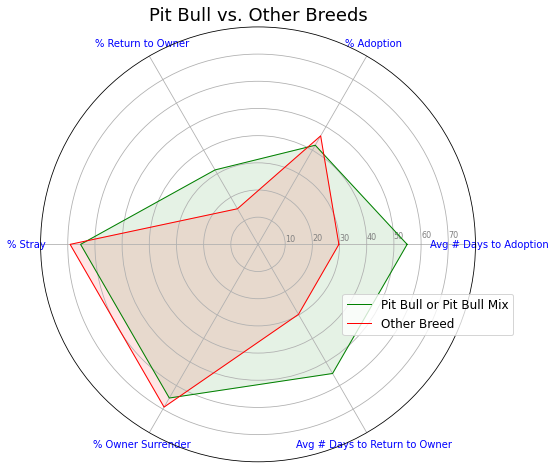

In [702]:
pi = math.pi
categories = criteria_list
N = len(categories)

pit_values = pit_values_list
pit_values += pit_values[:1]
other_values = other_values_list
other_values += other_values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
plt.title('Pit Bull vs. Other Breeds', fontsize=18)

# xaxis
plt.xticks(angles[:-1], categories, color='blue', size=10)

# yxis
ax.set_rlabel_position(1.5)
plt.yticks([10,20,30,40,50,60,70], ['10','20','30','40','50','60','70'], color='grey', size=8)
plt.ylim(0,80)

# data plotting
ax.plot(angles, pit_values, color='green', linewidth=1, linestyle='solid', label='Pit Bull or Pit Bull Mix')
ax.fill(angles, pit_values, color='green', alpha=0.1)
ax.plot(angles, other_values, color='red', linewidth=1, linestyle='solid', label='Other Breed')
ax.fill(angles, other_values, color='red', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, .4), fontsize=12);

### Interpretation of Results

We can see a few interesting insights from the above chart -
1. __% Owner Surrender__ is __Low__ as compared to other breeds - This implies that Pitbull's are less likely to be surrendered by their owner, indicating to their desirability
2. __% Return to Owner__ is __Very High__ as compared to other breeds - This could be because Pitbull's are loved by their owners and develop a sense of attachment that makes about 31% of the Pitbull's return to their owners (though, the owners take time to realize that they are missing their dog (high avg. number of days to return). Yet another indication for desirability.
3. __% Stray__ is __Low__ as compared to other breeds - Since Pitbulls are predominantly domestic breeds, pitbulls are lesser often stray than other breeds.

Across other metrics, we can observe that Pitbulls have a slightly lower percentage of adoption and once in the shelter, it takes about 54 days for a pitbull to find a home. This could be because of the belligerent image of pitbulls.

### Conclusion

Dog breeds certainly have an impact on their desirability to find a home. Animal Shelter can give home to more Pitbulls if they can raise awareness about how attached the owners feel with this breed, because clearly the data says that once you own a Pitbull it is more likely that one would want to keep the breed.